In [1]:
import yfinance as yf
from typing import Optional
from matplotlib import pyplot as plt

import jax
from jax import numpy as jnp
from jax.typing import ArrayLike

from matplotlib import pyplot as plt
import nifty8.re as jft

from functools import partial

In [2]:
import sys
import os
import pathlib

curr_path = pathlib.Path(os.getcwd())
mod_path = curr_path / "./signals_class"
sys.path.insert(0, str(mod_path))
from sg_class.signal_classes import StonksModel, ResponsePredict

SEED = 42
img_dir = curr_path / "imgs"

In [3]:
tickers_us = yf.Ticker("^GSPC")
tickers_eu = yf.Ticker("^FTSE")

snp_data = tickers_us.history(period="5y", interval="1d")
ftse_data = tickers_eu.history(period="5y", interval="1d")

In [4]:
snp_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-27 00:00:00-04:00,2985.469971,2987.310059,2945.530029,2961.790039,3246480000,0.0,0.0
2019-09-30 00:00:00-04:00,2967.070068,2983.850098,2967.070068,2976.739990,3249130000,0.0,0.0
2019-10-01 00:00:00-04:00,2983.689941,2992.530029,2938.699951,2940.250000,3560750000,0.0,0.0
2019-10-02 00:00:00-04:00,2924.780029,2924.780029,2874.929932,2887.610107,3914180000,0.0,0.0
2019-10-03 00:00:00-04:00,2885.379883,2911.129883,2855.939941,2910.629883,3515130000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-20 00:00:00-04:00,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,0.0,0.0
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,0.0,0.0
2024-09-24 00:00:00-04:00,5727.660156,5735.319824,5698.990234,5732.930176,3872710000,0.0,0.0


In [5]:
ftse_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-27 00:00:00+01:00,7351.100098,7440.799805,7351.000000,7426.200195,584318800,0.0,0.0
2019-09-30 00:00:00+01:00,7426.200195,7439.600098,7402.200195,7408.200195,655556100,0.0,0.0
2019-10-01 00:00:00+01:00,7408.200195,7433.200195,7352.799805,7360.299805,734563400,0.0,0.0
2019-10-02 00:00:00+01:00,7360.299805,7360.299805,7119.700195,7122.500000,747799600,0.0,0.0
2019-10-03 00:00:00+01:00,7122.500000,7129.000000,7004.399902,7077.600098,635551800,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-23 00:00:00+01:00,8230.000000,8262.500000,8210.099609,8259.700195,653474700,0.0,0.0
2024-09-24 00:00:00+01:00,8259.700195,8309.799805,8259.500000,8282.799805,1018907500,0.0,0.0
2024-09-25 00:00:00+01:00,8282.799805,8319.400391,8243.000000,8268.700195,712916300,0.0,0.0


In [6]:
idx_list = [i for i in snp_data.index.date if i in ftse_data.index.date]
len(idx_list)

1231

In [7]:
snp_data.index = snp_data.index.date
snp_data = snp_data.loc[idx_list]
snp_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2019-09-27,2985.469971,2987.310059,2945.530029,2961.790039,3246480000,0.0,0.0
2019-09-30,2967.070068,2983.850098,2967.070068,2976.739990,3249130000,0.0,0.0
2019-10-01,2983.689941,2992.530029,2938.699951,2940.250000,3560750000,0.0,0.0
2019-10-02,2924.780029,2924.780029,2874.929932,2887.610107,3914180000,0.0,0.0
2019-10-03,2885.379883,2911.129883,2855.939941,2910.629883,3515130000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-20,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,0.0,0.0
2024-09-23,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,0.0,0.0
2024-09-24,5727.660156,5735.319824,5698.990234,5732.930176,3872710000,0.0,0.0
2024-09-25,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,0.0,0.0


In [8]:
ftse_data.index = ftse_data.index.date
ftse_data = ftse_data.loc[idx_list]
ftse_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2019-09-27,7351.100098,7440.799805,7351.000000,7426.200195,584318800,0.0,0.0
2019-09-30,7426.200195,7439.600098,7402.200195,7408.200195,655556100,0.0,0.0
2019-10-01,7408.200195,7433.200195,7352.799805,7360.299805,734563400,0.0,0.0
2019-10-02,7360.299805,7360.299805,7119.700195,7122.500000,747799600,0.0,0.0
2019-10-03,7122.500000,7129.000000,7004.399902,7077.600098,635551800,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-20,8328.700195,8328.700195,8223.799805,8230.000000,1575731600,0.0,0.0
2024-09-23,8230.000000,8262.500000,8210.099609,8259.700195,653474700,0.0,0.0
2024-09-24,8259.700195,8309.799805,8259.500000,8282.799805,1018907500,0.0,0.0
2024-09-25,8282.799805,8319.400391,8243.000000,8268.700195,712916300,0.0,0.0


In [9]:
data = snp_data["High"]
target = snp_data["High"]

# Stocks model

In [10]:
data = snp_data["High"]
data.shape

(1231,)

In [11]:
test_size = 0.05
n_train = int((1 - test_size) * data.shape[0])
train, test = data.iloc[:n_train], data.iloc[n_train:]
try:
    train, test = jnp.array(train), jnp.array(test)
except:
    train, test = jnp.array(train), jnp.array(test)

assert train.shape[-1] + test.shape[-1] == data.shape[0]
train.shape, test.shape

2024-09-27 12:07:10.500972: W external/xla/xla/service/platform_util.cc:199] unable to create StreamExecutor for CUDA:0: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 47736619008


((1169,), (62,))

In [12]:
jax.devices()

[CpuDevice(id=0)]

In [13]:
# class Response(jft.Model):
#     def __init__(
#         self, 
#         field: jft.Model,
#         size: int,
#     ):
#         self.size = size
#         self.field = field
#         super().__init__(init=self.field.init)
        
#     def __call__(self, x):
#         res = self.field(x)
#         return res[:self.size]

In [14]:
signal = StonksModel(
    nt=int(data.shape[0]),
    dt=1.0,
    name="Stonks",
    avg_yearly_yield=1.07,
    std_yearly_yield=0.05,
    mean_fluctuation_amplitude=0.20 / 15,
    std_fluctuation_amplitude=0.05 / 12,
    ohp_gamma=0.2,
    starting_price_mean=3000.0,
    starting_price_std=100.0,
)
signal_response = ResponsePredict(
    field=signal,
    size=train.shape[0],
)

noise_lvl = 0.2
noise_cov = lambda x: noise_lvl ** 2 * x
noise_cov_inv = lambda x: noise_lvl ** -2 * x

likelihood = jft.Gaussian(train, noise_cov_inv).amend(signal_response)

assuming a diagonal covariance matrix;
setting `std_inv` to `cov_inv(ones_like(data))**0.5`


In [15]:
n_vi_iterations = 6
# n_vi_iterations = 12
delta = 1e-4
n_samples = 4
# n_samples = 40

key = jax.random.key(seed=SEED)
key, k_i, k_o = jax.random.split(key, 3)
# NOTE, changing the number of samples always triggers a resampling even if
# `resamples=False`, as more samples have to be drawn that did not exist before.
samples, state = jft.optimize_kl(
    likelihood,
    jft.Vector(likelihood.init(k_i)),
    n_total_iterations=n_vi_iterations,
    n_samples=lambda i: n_samples // 2 if i < 2 else n_samples,
    # Source for the stochasticity for sampling
    key=k_o,
    # Names of parameters that should not be sampled but still optimized
    # can be specified as point_estimates (effectively we are doing MAP for
    # these degrees of freedom).
    # point_estimates=("cfax1flexibility", "cfax1asperity"),
    # Arguments for the conjugate gradient method used to drawing samples from
    # an implicit covariance matrix
    draw_linear_kwargs=dict(
        cg_name="SL",
        cg_kwargs=dict(absdelta=delta * jft.size(likelihood.domain) / 10.0, maxiter=100),
    ),
    # Arguements for the minimizer in the nonlinear updating of the samples
    nonlinearly_update_kwargs=dict(
        minimize_kwargs=dict(
            name="SN",
            xtol=delta,
            cg_kwargs=dict(name=None),
            maxiter=5,
        )
    ),
    # Arguments for the minimizer of the KL-divergence cost potential
    kl_kwargs=dict(
        minimize_kwargs=dict(
            name="M", xtol=delta, cg_kwargs=dict(name=None), maxiter=35
        )
    ),
    sample_mode="nonlinear_resample",
    odir="results_intro",
    resume=False,
)

OPTIMIZE_KL: Starting 0001
SL: Iteration 0 ⛰:+1.6782e+09 Δ⛰:inf ➽:1.2330e-02
SL: Iteration 1 ⛰:+1.6711e+08 Δ⛰:1.5111e+09 ➽:1.2330e-02
SL: Iteration 2 ⛰:+1.3419e+07 Δ⛰:1.5369e+08 ➽:1.2330e-02
SL: Iteration 3 ⛰:+1.0957e+07 Δ⛰:2.4622e+06 ➽:1.2330e-02
SL: Iteration 4 ⛰:+4.0601e+06 Δ⛰:6.8970e+06 ➽:1.2330e-02
SL: Iteration 5 ⛰:+3.6830e+06 Δ⛰:3.7702e+05 ➽:1.2330e-02
SL: Iteration 6 ⛰:+2.5490e+06 Δ⛰:1.1340e+06 ➽:1.2330e-02
SL: Iteration 7 ⛰:+1.7229e+06 Δ⛰:8.2612e+05 ➽:1.2330e-02
SL: Iteration 8 ⛰:+1.2803e+06 Δ⛰:4.4260e+05 ➽:1.2330e-02
SL: Iteration 9 ⛰:+1.2616e+06 Δ⛰:1.8722e+04 ➽:1.2330e-02
SL: Iteration 10 ⛰:+1.2612e+06 Δ⛰:3.8437e+02 ➽:1.2330e-02
SL: Iteration 11 ⛰:+9.2643e+05 Δ⛰:3.3477e+05 ➽:1.2330e-02
SL: Iteration 12 ⛰:+6.6885e+05 Δ⛰:2.5757e+05 ➽:1.2330e-02
SL: Iteration 13 ⛰:+5.0278e+05 Δ⛰:1.6607e+05 ➽:1.2330e-02
SL: Iteration 14 ⛰:+5.0259e+05 Δ⛰:1.9096e+02 ➽:1.2330e-02
SL: Iteration 15 ⛰:+3.6997e+05 Δ⛰:1.3261e+05 ➽:1.2330e-02
SL: Iteration 16 ⛰:+2.7505e+05 Δ⛰:9.4926e+04 ➽:1.2330e-02
SL: 

In [16]:
sigs_on_train_gen = (signal_response(s) for s in samples)
sigs_predictions_gen = (signal(s) for s in samples)

mean_samps_as_train = jft.mean(tuple(sigs_on_train_gen))
mean_samps_col = jnp.array(tuple(sigs_predictions_gen))
mean_samps_all = mean_samps_col.mean(axis=0)

mean_samps_as_train.shape, mean_samps_col.shape, mean_samps_all.shape

((1169,), (8, 1231), (1231,))

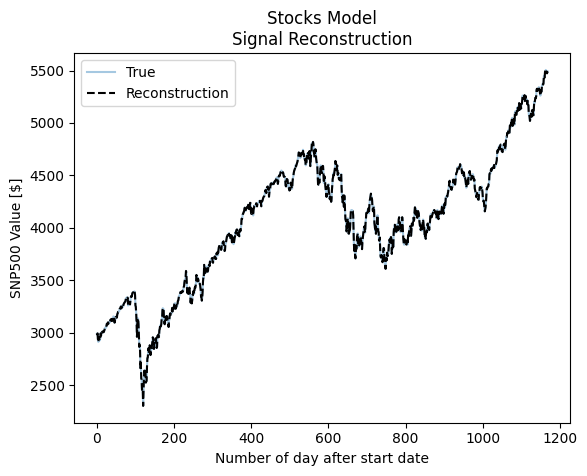

In [17]:
fig = plt.figure()
plt.plot(train, alpha=0.4, label="True")
plt.plot(signal_response(samples[0]), "--k", label="Reconstruction")
plt.legend()

plt.title("Stocks Model\nSignal Reconstruction")
plt.ylabel("SNP500 Value [$]")
plt.xlabel("Number of day after start date")
plt.savefig(
    img_dir / f"SM-nvi_iter_{n_vi_iterations}-nsamps_{n_samples}-training_data_reconstruction-v01.png",
    transparent=True,
)
plt.show()

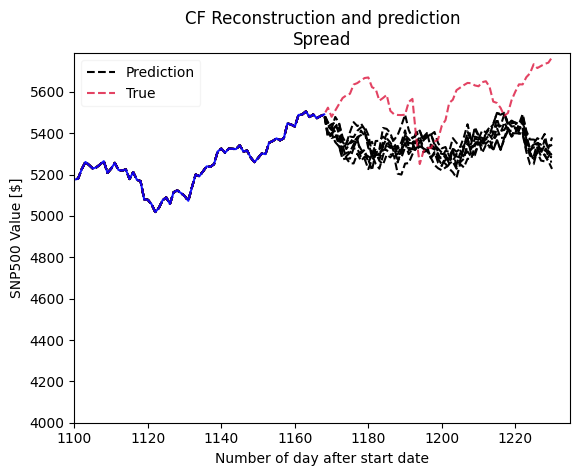

In [18]:
fig = plt.figure()
plt.plot(mean_samps_col[0], "--k", label="Prediction")
plt.plot(mean_samps_col[1:].T, "--k")

plt.plot(data.to_numpy(), "--", c="crimson", alpha=0.8, label='True')
plt.plot(train, "b", alpha=0.9)
plt.xlim(1100, 1235)
plt.ylim(4000, max([mean_samps_col.max(), data.to_numpy().max()]) + 20)

plt.legend(
    fancybox=True, 
    framealpha=0.2,
)
plt.title("CF Reconstruction and prediction\nSpread")
plt.ylabel("SNP500 Value [$]")
plt.xlabel("Number of day after start date")
plt.savefig(
    img_dir / f"SM-nvi_iter_{n_vi_iterations}-nsamps_{n_samples}-spread_of_predictions-v01.png",
    transparent=True,
)
plt.show()

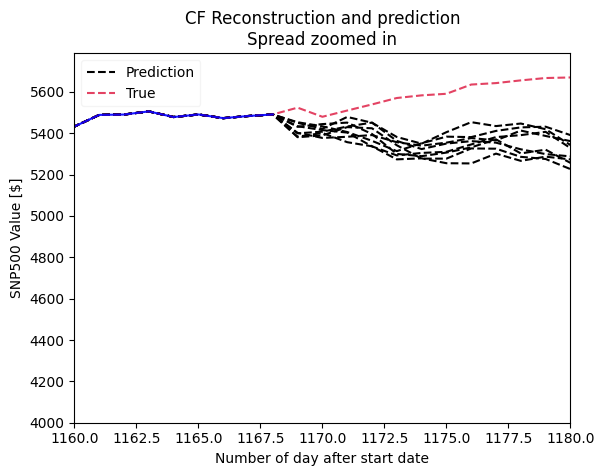

In [19]:
fig = plt.figure()
plt.plot(mean_samps_col[0], "--k", label="Prediction")
plt.plot(mean_samps_col[1:].T, "--k")

plt.plot(data.to_numpy(), "--", c="crimson", alpha=0.8, label='True')
plt.plot(train, "b", alpha=0.9)
plt.xlim(1160, 1180)
plt.ylim(4000, max([mean_samps_col.max(), data.to_numpy().max()]) + 20)

plt.legend(
    fancybox=True, 
    framealpha=0.2,
)
plt.title("CF Reconstruction and prediction\nSpread zoomed in")
plt.ylabel("SNP500 Value [$]")
plt.xlabel("Number of day after start date")
plt.savefig(
    img_dir / f"SM-nvi_iter_{n_vi_iterations}-nsamps_{n_samples}-spread_of_predictions-zoom-in-v01.png",
    transparent=True,
)
plt.show()

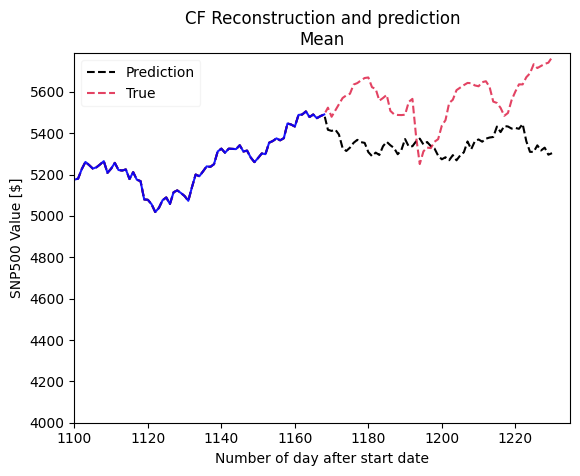

In [20]:
fig = plt.figure()
plt.plot(mean_samps_all, "--k", label="Prediction")

plt.plot(data.to_numpy(), "--", c="crimson", alpha=0.8, label='True')
plt.plot(train, "b", alpha=0.9)
plt.xlim(1100, 1235)
plt.ylim(4000, max([mean_samps_col.max(), data.to_numpy().max()]) + 20)

plt.legend(
    fancybox=True, 
    framealpha=0.2,
)
plt.title("CF Reconstruction and prediction\nMean")
plt.ylabel("SNP500 Value [$]")
plt.xlabel("Number of day after start date")
plt.savefig(
    img_dir / f"SM-nvi_iter_{n_vi_iterations}-nsamps_{n_samples}-mean_of_predictions-v01.png",
    transparent=True,
)
plt.show()

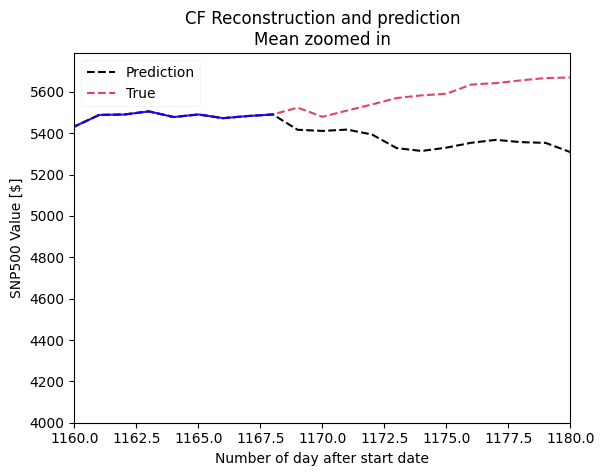

In [21]:
fig = plt.figure()
plt.plot(mean_samps_all, "--k", label="Prediction")

plt.plot(data.to_numpy(), "--", c="crimson", alpha=0.8, label='True')
plt.plot(train, "b", alpha=0.9)
plt.xlim(1160, 1180)
plt.ylim(4000, max([mean_samps_col.max(), data.to_numpy().max()]) + 20)

plt.legend(
    fancybox=True, 
    framealpha=0.2,
)
plt.title("CF Reconstruction and prediction\nMean zoomed in")
plt.ylabel("SNP500 Value [$]")
plt.xlabel("Number of day after start date")
plt.savefig(
    img_dir / f"SM-nvi_iter_{n_vi_iterations}-nsamps_{n_samples}-mean_of_predictions_zoomed_in-v01.png",
    transparent=True,
)
plt.show()

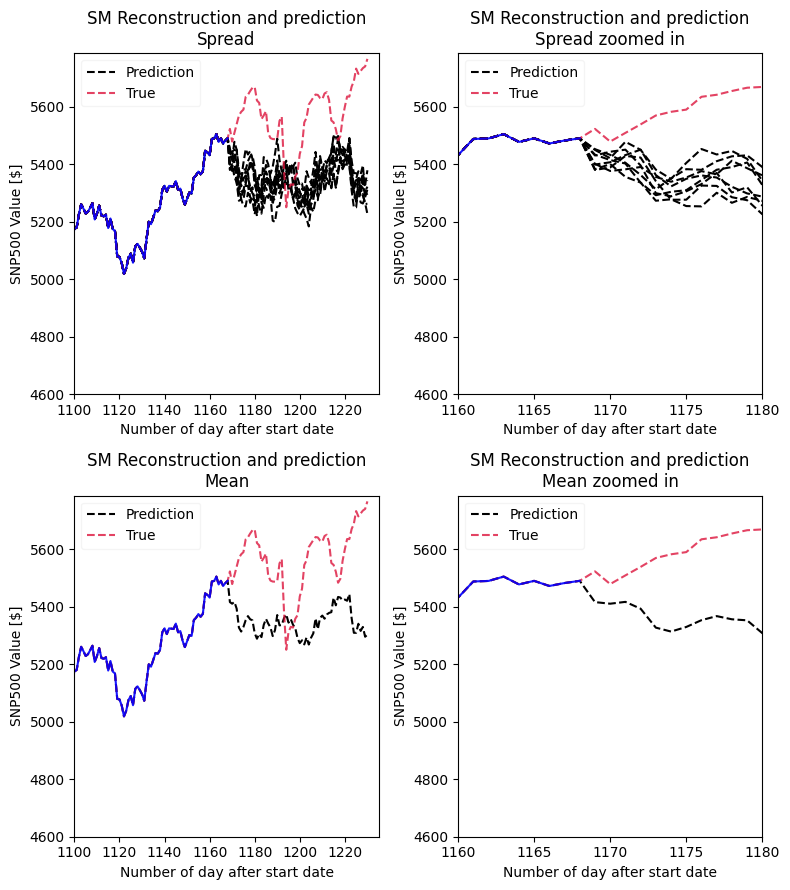

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(8, 9))

for i, (axs2, plt_type) in enumerate(zip(axs, ["Spread", "Mean"])):
    for j, (ax, zoom_tit) in enumerate(zip(axs2, ["", " zoomed in"])):
        if i == 0:
            ax.plot(mean_samps_col[0], "--k", label="Prediction")
            ax.plot(mean_samps_col[1:].T, "--k")
        else:
            ax.plot(mean_samps_all, "--k", label="Prediction")
        ax.plot(data.to_numpy(), "--", c="crimson", alpha=0.8, label='True')
        ax.plot(train, "b", alpha=0.9)
        ax.set_ylabel("SNP500 Value [$]")
        ax.set_xlabel("Number of day after start date")
        ax.set_ylim(4600, max([mean_samps_col.max(), data.to_numpy().max()]) + 20)
        if j == 0:
            ax.set_xlim(1100, 1235)
        else: 
            ax.set_xlim(1160, 1180)
        ax.legend(
            fancybox=True, 
            framealpha=0.2,
        )
        ax.set_title(f"SM Reconstruction and prediction\n{plt_type}{zoom_tit}")
        
plt.tight_layout()
plt.savefig(
    img_dir / f"SM-nvi_iter_{n_vi_iterations}-nsamps_{n_samples}-sum_plot-v01.png",
    transparent=True,
)
plt.show()